In [96]:
import numpy as np
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

# Testing GARCH

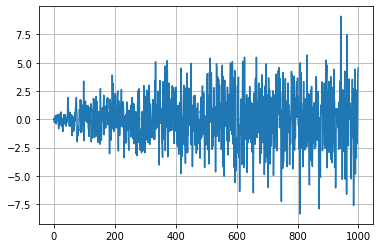

In [134]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [135]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [136]:
p = 1
q = 1

In [137]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [138]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 159903.10777709674
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1836.9121584766135
Iteration:      3,   Func. Count:     15,   Neg. LLF: 2333.7742010329603
Iteration:      4,   Func. Count:     20,   Neg. LLF: 1845.3761796810304
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1964.6650818209666
Iteration:      6,   Func. Count:     30,   Neg. LLF: 1866.3371876348958
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1839.3206148917654
Iteration:      8,   Func. Count:     40,   Neg. LLF: 1938.7065603383344
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1844.2243624487398
Iteration:     10,   Func. Count:     50,   Neg. LLF: 1826.7187841119307
Iteration:     11,   Func. Count:     55,   Neg. LLF: 1819.3059564169578
Iteration:     12,   Func. Count:     60,   Neg. LLF: 1815.7274058782573
Iteration:     13,   Func. Count:     64,   Neg. LLF: 1815.7378735706543
Iteration:     14,   Func. Count:     69,   Neg. LL

In [139]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1815.49
Distribution:                  Normal   AIC:                           3636.98
Method:            Maximum Likelihood   BIC:                           3651.39
                                        No. Observations:                  900
Date:                Sat, Oct 09 2021   Df Residuals:                      900
Time:                        23:54:13   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.4

In [140]:
fitted.params

omega       0.009412
alpha[1]    0.000003
beta[1]     0.999947
Name: params, dtype: float64

In [147]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [155]:
forecast.residual_variance.values[0]

array([8.41820319, 8.42719044, 8.43617723, 8.44516358, 8.45414947,
       8.46313491, 8.47211989, 8.48110442, 8.4900885 , 8.49907212,
       8.5080553 , 8.51703802, 8.52602028, 8.5350021 , 8.54398346,
       8.55296437, 8.56194482, 8.57092483, 8.57990438, 8.58888347,
       8.59786212, 8.60684031, 8.61581805, 8.62479534, 8.63377217,
       8.64274855, 8.65172448, 8.66069996, 8.66967498, 8.67864956,
       8.68762368, 8.69659734, 8.70557056, 8.71454332, 8.72351563,
       8.73248749, 8.74145889, 8.75042985, 8.75940035, 8.7683704 ,
       8.77733999, 8.78630914, 8.79527783, 8.80424607, 8.81321386,
       8.82218119, 8.83114807, 8.84011451, 8.84908049, 8.85804601,
       8.86701109, 8.87597571, 8.88493988, 8.8939036 , 8.90286687,
       8.91182969, 8.92079205, 8.92975396, 8.93871543, 8.94767643,
       8.95663699, 8.9655971 , 8.97455675, 8.98351595, 8.9924747 ,
       9.001433  , 9.01039085, 9.01934824, 9.02830519, 9.03726168,
       9.04621772, 9.05517331, 9.06412845, 9.07308313, 9.08203

In [149]:
forecast.variance.values[0]

array([8.41820319, 8.42719044, 8.43617723, 8.44516358, 8.45414947,
       8.46313491, 8.47211989, 8.48110442, 8.4900885 , 8.49907212,
       8.5080553 , 8.51703802, 8.52602028, 8.5350021 , 8.54398346,
       8.55296437, 8.56194482, 8.57092483, 8.57990438, 8.58888347,
       8.59786212, 8.60684031, 8.61581805, 8.62479534, 8.63377217,
       8.64274855, 8.65172448, 8.66069996, 8.66967498, 8.67864956,
       8.68762368, 8.69659734, 8.70557056, 8.71454332, 8.72351563,
       8.73248749, 8.74145889, 8.75042985, 8.75940035, 8.7683704 ,
       8.77733999, 8.78630914, 8.79527783, 8.80424607, 8.81321386,
       8.82218119, 8.83114807, 8.84011451, 8.84908049, 8.85804601,
       8.86701109, 8.87597571, 8.88493988, 8.8939036 , 8.90286687,
       8.91182969, 8.92079205, 8.92975396, 8.93871543, 8.94767643,
       8.95663699, 8.9655971 , 8.97455675, 8.98351595, 8.9924747 ,
       9.001433  , 9.01039085, 9.01934824, 9.02830519, 9.03726168,
       9.04621772, 9.05517331, 9.06412845, 9.07308313, 9.08203

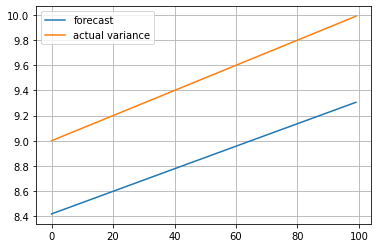

In [146]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [95]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim